# Pipeline configuration

In [13]:
confi_dict = {

    'general':{
        'root_dir':r"C:\Users\na-ch\Desktop\estudio\Master_Big_Data\03_TFM\02_Code\dataset_test",
        'dataset_dir': "CASIA_IrisV1"
    },

    '1_tratarDataset': {
        'show_first' : False
    },

    '1.1_dataAugmentation':{
        'gaussianNoise' : True,
        'stdGN': [5, 10, 15, 20, 25, 30],
        'skipFiles': 1, 
        ''' 
        1 means that you are skiping 1 for the noise augmentation, 2 skiping 2 and so on. If you don't want to skip files set it as 0
        '''
        'afinTransformation': True
    },

    '2.1_segmentation':{
        'redNeuronal' : "Iris_unet_d5.h5", 
        'numSamplesGenerator' : 3, 
        'verImagen' : True
    }

}

# 1: Tratar el dataset CASIA



## 1 tratar_dataset_casia()

In [14]:
def tratar_dataset_casia(dict):
    
    print("Función 1, tratar_dataset_casia()")
    
    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import shutil
    except:
        !pip install shutil
        import shutil
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(dict['general']['root_dir'])
    
    def copy_all_samples(path_samples, destination_directory):
        '''
        Copia todas las muestras del dataset de CASIA a un único directorio.
        '''
        if not os.path.exists(path_samples):
            print("El directorio indicado como input no existe")
        elif not os.path.exists(destination_directory):
            ''' 
            Comprobamos que el directorio del output no existe
            '''
            os.mkdir(destination_directory) # Creamos un nuevo directorio 
            for root, dirs, files in os.walk(path_samples):
                for file in files:
                    path_file = os.path.join(root,file)
                    shutil.copy2(path_file,destination_directory)   
            print("-> Muestras copiadas satisfactoriamente.")
        elif len(os.listdir(destination_directory)) < 1:
            ''' 
            Comprobamos que el directorio del output no está vacío
            '''
            for root, dirs, files in os.walk(path_samples):
                for file in files:
                    path_file = os.path.join(root,file)
                    shutil.copy2(path_file,destination_directory)   
            print("-> Muestras copiadas satisfactoriamente.")
        else:
            print("-> Muetras previamente copiadas.")

    dict['general']['dataset_unif_dir'] = dict['general']['dataset_dir']+"_unif"

    copy_all_samples(dict['general']['dataset_dir'], dict['general']['dataset_unif_dir'])

    if dict['1_tratarDataset']['show_first']:
        ''' 
        Si en la configuración show_first es True, se mostrará el primer elemento del nuevo directorio.
        '''
        path_img = dict['general']['dataset_unif_dir'] + os.sep + os.listdir(dict['general']['dataset_unif_dir'])[0]
        img = imageio.imread(path_img)
        plt.title("Primer elemento de " + dict['general']['dataset_unif_dir'])
        plt.imshow(img)
    
    ''' 
    Pasando el diccionario con la configuración a la siguiente función
    '''
    return dict


## 1.1 data_augmentation()

In [15]:
def data_augmentation(dict):

    print("Función 1.1, data_augmentation()")
    
    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import skimage.io as io
    except:
        !pip install scikit-image
        import skimage.io as io
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        from tensorflow.keras.layers import GaussianNoise
    except:
        !pip install tensorflow
        from tensorflow.keras.layers import GaussianNoise
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    import random

    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(dict['general']['root_dir'])
    
    ''' 
    Comprobamos si el ruido gaussiano ha sido establecido como True en la configuración
    '''

    if dict['1.1_dataAugmentation']['gaussianNoise']:

        ''' 
        Comprobamos si el ruido gaussiano se ha aplicado anteriormente, si es así, el primer elemento del directorio debería de tener el sufijo _augmentation
        '''
        if "_augment" in os.listdir(dict['general']['dataset_unif_dir'])[1]:
            print("->El ruido gaussiano ya se ha ejecutado con anterioridad")
        else:     
            ''' 
            Desde el directorio unificado creamos nuevas imágenes utilizando el ruido gaussiano como data augmentation.
            Añadimos un contador para que el augmentation sea de 1 cada dos imágenes.
            '''
            i = 0
            for filename in os.listdir(dict['general']['dataset_unif_dir']):
                if dict['1.1_dataAugmentation']['skipFiles'] == 0:
                    path = dict['general']['dataset_unif_dir'] + os.sep + filename
                    image = imageio.imread(path)/255
                    std_rdm = random.choice(dict['1.1_dataAugmentation']['stdGN'])
                    gaussean_function = GaussianNoise(std_rdm/100)
                    noisey = gaussean_function(image.astype(np.float32),training=True)
                    name = path[:-4] + '_augment.bmp'
                    plt.imsave(name, noisey, cmap='gray')
                elif i < dict['1.1_dataAugmentation']['skipFiles']:
                    path = dict['general']['dataset_unif_dir'] + os.sep + filename
                    image = imageio.imread(path)/255
                    std_rdm = random.choice(dict['1.1_dataAugmentation']['stdGN'])
                    gaussean_function = GaussianNoise(std_rdm/100)
                    noisey = gaussean_function(image.astype(np.float32),training=True)
                    name = path[:-4] + '_augment.bmp'
                    io.imsave(name, noisey)
                    i += 1
                else:
                    i = 0
            print("->Data augmentation 'ruido gausseano' ejecutado correctamente")
    else:
        print("->Saltando el ruido gausseano en data augmentation")

    ''' 
    Pasando el diccionario con la configuración a la siguiente función
    '''
    return dict

# 2 Red U-Net v2

## 2.1 segmentation()

In [16]:
def segmentation(dict):

    print("Función 2.1, segmentation()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import cv2
    except:
        import cv2
    try:
        import shutil
    except:
        !pip install shutil
        import shutil
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import skimage.transform as trans
        from skimage.io import imshow
        import skimage.io as io
    except:
        !pip install scikit-image
        import skimage.transform as trans
        from skimage.io import imshow
        import skimage.io as io
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        from keras.models import load_model
    except:
        !pip install tensorflow 
        from keras.models import load_model
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        from PIL import Image
    except:
        !pip install Pillow
        from PIL import Image
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(dict['general']['root_dir'])

    ''' 
    Cargamos el modelo de segmentación
    '''
    model = load_model(dict['2.1_segmentation']['redNeuronal'])
    print("->Modelo cargado")

    ''' 
    Creamos un generador con un número n de imágenes para pasarselas al modelo en el predict
    *Recordemos que este modelo ya está entrenado para la segmentación del ojo
    '''
    def testGenerator(directory, num_image, target_size = (320,320)):
        '''
        Genera las muestras que se le pasarán al método predecir de la red preentrenada.
        
        Parámetros:
        directory -- directorio dónde se encuentran las muestras a generar
        num_image -- número máximo de imágenes que queremos generar
        target_size -- shape de de la muestra
        flag_multi_class -- (de momento mantener pero no nos es útil)
        '''
        i = 0
        for file in os.listdir(directory):
            if i == num_image:
                break # sólo queremos x imágenes para probar
            path_file = os.path.join(directory,file)
            img = imageio.imread(path_file)
            img = img / 255
            img = trans.resize(img,target_size)
            img = np.reshape(img, img.shape+(1,))
            img = np.reshape(img, (1,) + img.shape)
            i += 1
            yield img
    
    def get_samples_names(directory, num_image):
        '''
        Devuelve los nombres de las muestras (los que se encuentran en los directorios hoja)
        
        Parámetros:
        directory -- directorio de cuyos subdirectorios hoja se quiere el nombre 
        '''
        i = 0
        names = []
        for file in os.listdir(directory):
            if i == num_image:
                break # sólo queremos x imágenes para probar
            names.append(str(file))
            i += 1
                
        return names

    def saveResult(save_path, name_path, npyfile, num_image):
        '''
        Guarda los imágenes segmentadas resultado de la red preentrenada
        
        Parámetros:
        save_path -- ruta en la que se guardarán las muestras segmentadas
        name_path -- directorio del que cogeremos los nombres de las muestras
        npyfile -- resultado de la red preentrenada
        '''
        dim = (320, 280) # dimensioned de las muestras del dataset
        if os.path.exists(save_path):
            shutil.rmtree(save_path)
        os.mkdir(save_path)
        names = get_samples_names(name_path, num_image)
        for i, item in enumerate(npyfile):
            img = item[:,:,0]
            img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            io.imsave(os.path.join(save_path,names[i]),img)    


    testGene = testGenerator(dict['general']['dataset_unif_dir'], dict['2.1_segmentation']['numSamplesGenerator'])
    Unet_results = model.predict(testGene,dict['2.1_segmentation']['numSamplesGenerator'],verbose=1)
    dict['general']['dataset_unif_seg_dir'] =  dict['general']['dataset_unif_dir']  + "_seg" 
    saveResult(dict['general']['dataset_unif_seg_dir'], dict['general']['dataset_unif_dir'], Unet_results, dict['2.1_segmentation']['numSamplesGenerator'])
    print("->Segmentaciones guardadas")

    if dict['2.1_segmentation']['verImagen']:
        sample = "001_1_1.bmp"
        path_img = dict['general']['dataset_unif_dir'] + os.sep + sample
        path_back = dict['general']['dataset_unif_seg_dir'] + os.sep + sample
        image = Image.open(path_img)
        background = Image.open(path_back)
        background.paste(image, (0, 0), image)
        plt.imshow(background, cmap='gray');

## 2.2 normalization()

In [ ]:
def normalization(dict):

    print("Función 2.2, normalization()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(dict['general']['root_dir'])

    

# Definir y ejecutar el pipeline

## Definición del pipeline

In [5]:
try:
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.pipeline import Pipeline
except ImportError as e:
    !pip install sklearn
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.pipeline import Pipeline

In [17]:
_1_tratar_dataset_pip = FunctionTransformer(tratar_dataset_casia)
_1_1_data_augmentation_pip = FunctionTransformer(data_augmentation)
_2_1_segmentation_pip = FunctionTransformer(segmentation)

iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip), ('_1_1_dataAugmentation', _1_1_data_augmentation_pip), ('_2_1_segmentation', _2_1_segmentation_pip)])
# iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip)])


## Ejecición pipeline


Función 1, tratar_dataset_casia()


Lossy conversion from float32 to uint8. Range [-0.3856901526451111, 1.4601566791534424]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3902791142463684, 1.4215900897979736]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.3451234996318817, 1.5804598331451416]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-1.0490528345108032, 2.0738911628723145]. Convert image to uint8 prior to saving to suppress this warning.


-> Muestras copiadas satisfactoriamente.
Función 1.1, data_augmentation()


Lossy conversion from float32 to uint8. Range [-0.533065140247345, 1.7367429733276367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.02050134539604187, 1.168955683708191]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-0.9181095957756042, 2.197012424468994]. Convert image to uint8 prior to saving to suppress this warning.


->Data augmentation 'ruido gausseano' ejecutado correctamente
Función 2.1, segmentation()
->Modelo cargado
3/3 [==============================] - 9s 3s/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


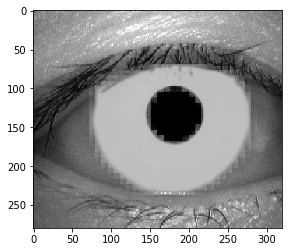

In [18]:
iris_recognition_pipeline.transform(confi_dict)